# <center>Projet ADEME – Modélisation des données <br>Contextualisation</center>
![500-1380067502.1002.jpg](./public/Source/Image/500-1380067502.1002.jpg)



[(0, 7), (0, 9), (1, 0), (2, 5), (3, 0), (5, 8), (5, 15), (7, 2), (7, 18), (8, 10), (8, 3), (8, 12), (9, 13), (9, 13), (9, 18), (11, 10), (11, 0), (13, 17), (13, 18), (13, 16), (15, 3), (15, 15), (15, 18), (16, 12)]


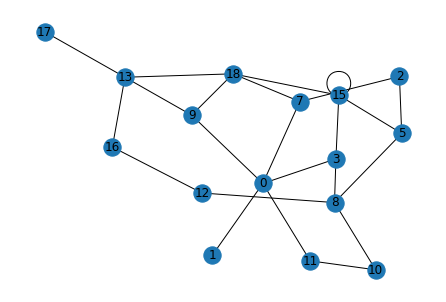

In [40]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generateEdgeList(nbIntersection,nbConnection):
        listValue = []
        for i in range(nbIntersection):
                for j in range(random.randint(0,nbConnection)):
                        way = (i, random.randint(0,nbIntersection))
                        listValue.append(way)
        graph = nx.Graph()
        print(listValue)
        graph.add_edges_from(listValue)
        nx.draw(graph, with_labels=True)
        plt.show()
generateEdgeList(18,3)